In [18]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer

In [2]:
data = pd.read_csv("huvec.csv")

In [3]:
features = data.iloc[:,1:-1].apply(pd.to_numeric,errors='coerce')

In [4]:
features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,141.78,40.85,56.93,90.81,180.40,78.45,60.21,57.38,154.89,81.11,138.46,203.75
1,434.15,242.30,332.56,102.73,417.88,613.15,1098.74,1177.52,986.82,307.63,69.26,274.42
2,326.56,260.99,207.67,100.49,398.50,235.43,612.98,664.81,340.17,298.86,92.27,192.70
3,22.47,4.57,4.12,27.21,8.93,4.42,4.22,6.70,2.23,8.57,45.80,24.14
4,23.80,18.83,14.43,15.25,29.54,17.01,7.76,25.86,6.24,14.57,102.49,25.40
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,103.93,54.12,63.28,102.17,71.54,49.47,40.30,82.24,19.90,74.67,318.06,107.65
7130,216.92,104.79,81.67,115.76,263.51,107.85,102.38,93.07,72.44,120.64,253.08,149.66
7131,248.53,68.18,120.07,87.48,266.54,91.35,74.42,98.38,114.81,132.27,280.14,148.33
7132,157.63,86.28,53.77,230.81,68.84,58.74,56.40,90.99,28.92,117.16,364.89,166.36


In [5]:
normalized_features = Normalizer().fit_transform(features)

In [6]:
normalized_features = pd.DataFrame(normalized_features) 

In [7]:
normalized_features.columns = ['DNase','H2A','H3K27ac','H3K27me3','H3K36me3','H3K4me1','H3K4me2','H3K4me3','H3K79me2','H3K9ac','H3K9me3','H4K20me1'] 

In [8]:
normalized_features

,DNase,H2A,H3K27ac,H3K27me3,H3K36me3,H3K4me1,H3K4me2,H3K4me3,H3K79me2,H3K9ac,H3K9me3,H4K20me1
0,0.343737,0.099038,0.138023,0.220163,0.437368,0.190197,0.145975,0.139114,0.375521,0.196646,0.335687,0.493979
1,0.201089,0.112228,0.154035,0.047582,0.193553,0.283998,0.508913,0.545402,0.457074,0.142488,0.032080,0.127105
2,0.265697,0.212348,0.168965,0.081761,0.324229,0.191552,0.498736,0.540906,0.276771,0.243160,0.075073,0.156785
3,0.346558,0.070484,0.063543,0.419664,0.137729,0.068170,0.065086,0.103335,0.034394,0.132176,0.706380,0.372315
4,0.196612,0.155555,0.119206,0.125980,0.244030,0.140520,0.064105,0.213629,0.051549,0.120363,0.846670,0.209829
...,...,...,...,...,...,...,...,...,...,...,...,...
7129,0.257543,0.134111,0.156810,0.253181,0.177279,0.122589,0.099865,0.203794,0.049313,0.185035,0.788165,0.266761
7130,0.406637,0.196439,0.153098,0.217003,0.493974,0.202175,0.191921,0.174468,0.135796,0.226151,0.474422,0.280552
7131,0.443346,0.121625,0.214190,0.156053,0.475474,0.162957,0.132756,0.175497,0.204807,0.235953,0.499734,0.264602
7132,0.296054,0.162048,0.100989,0.433498,0.129292,0.110323,0.105928,0.170894,0.054316,0.220045,0.685321,0.312450


In [9]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(normalized_features, normalized_features))

[[1.         0.67402074 0.73437267 ... 0.93287512 0.79202619 0.79606299]
 [0.67402074 1.         0.95664541 ... 0.62170217 0.43525179 0.90303395]
 [0.73437267 0.95664541 1.         ... 0.73214822 0.54287462 0.92392607]
 ...
 [0.93287512 0.62170217 0.73214822 ... 1.         0.85194805 0.83709363]
 [0.79202619 0.43525179 0.54287462 ... 0.85194805 1.         0.74410329]
 [0.79606299 0.90303395 0.92392607 ... 0.83709363 0.74410329 1.        ]]


C:\Users\leyen\anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


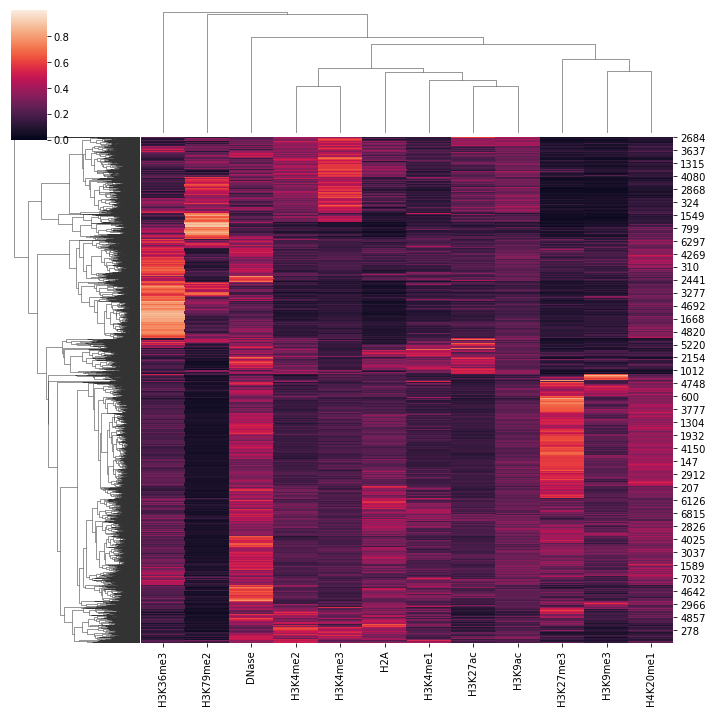

In [10]:
import seaborn as sns 

sns.clustermap(normalized_features)

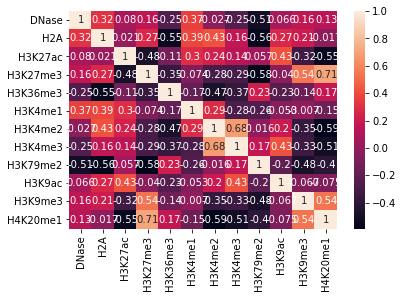

In [11]:
# generating correlation heatmap 
sns.heatmap(normalized_features.corr(), annot = True) 

plt.show() 

## Silhouette coefficient

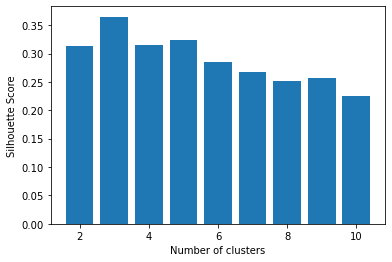

In [12]:
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(normalized_features, KMeans(n_clusters = n_cluster).fit_predict(normalized_features))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6, 7, 8, 9 ,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [13]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=12
)

In [14]:
kmeans.fit(normalized_features)

KMeans(init='random', n_clusters=3, random_state=12)

In [15]:
print(kmeans.inertia_)

print(kmeans.cluster_centers_)

print(kmeans.n_iter_)

801.0401659348754
[[0.42102416 0.30455552 0.18712265 0.39851506 0.23194091 0.23558983
  0.22216621 0.2046843  0.07664606 0.25577051 0.24566711 0.31981536]
 [0.30899067 0.24409811 0.27876036 0.08803458 0.20835518 0.18654217
  0.36622204 0.45942224 0.32430772 0.29240119 0.07830366 0.12574225]
 [0.30788546 0.11340778 0.19638611 0.12442512 0.60525862 0.19028265
  0.15636154 0.15081595 0.3438251  0.21563802 0.13856546 0.28013108]]
13


In [16]:
labels = pd.DataFrame(kmeans.labels_) 
labeled = pd.concat((features,labels),axis=1)
labeled = labeled.rename({0:'labels'},axis=1)

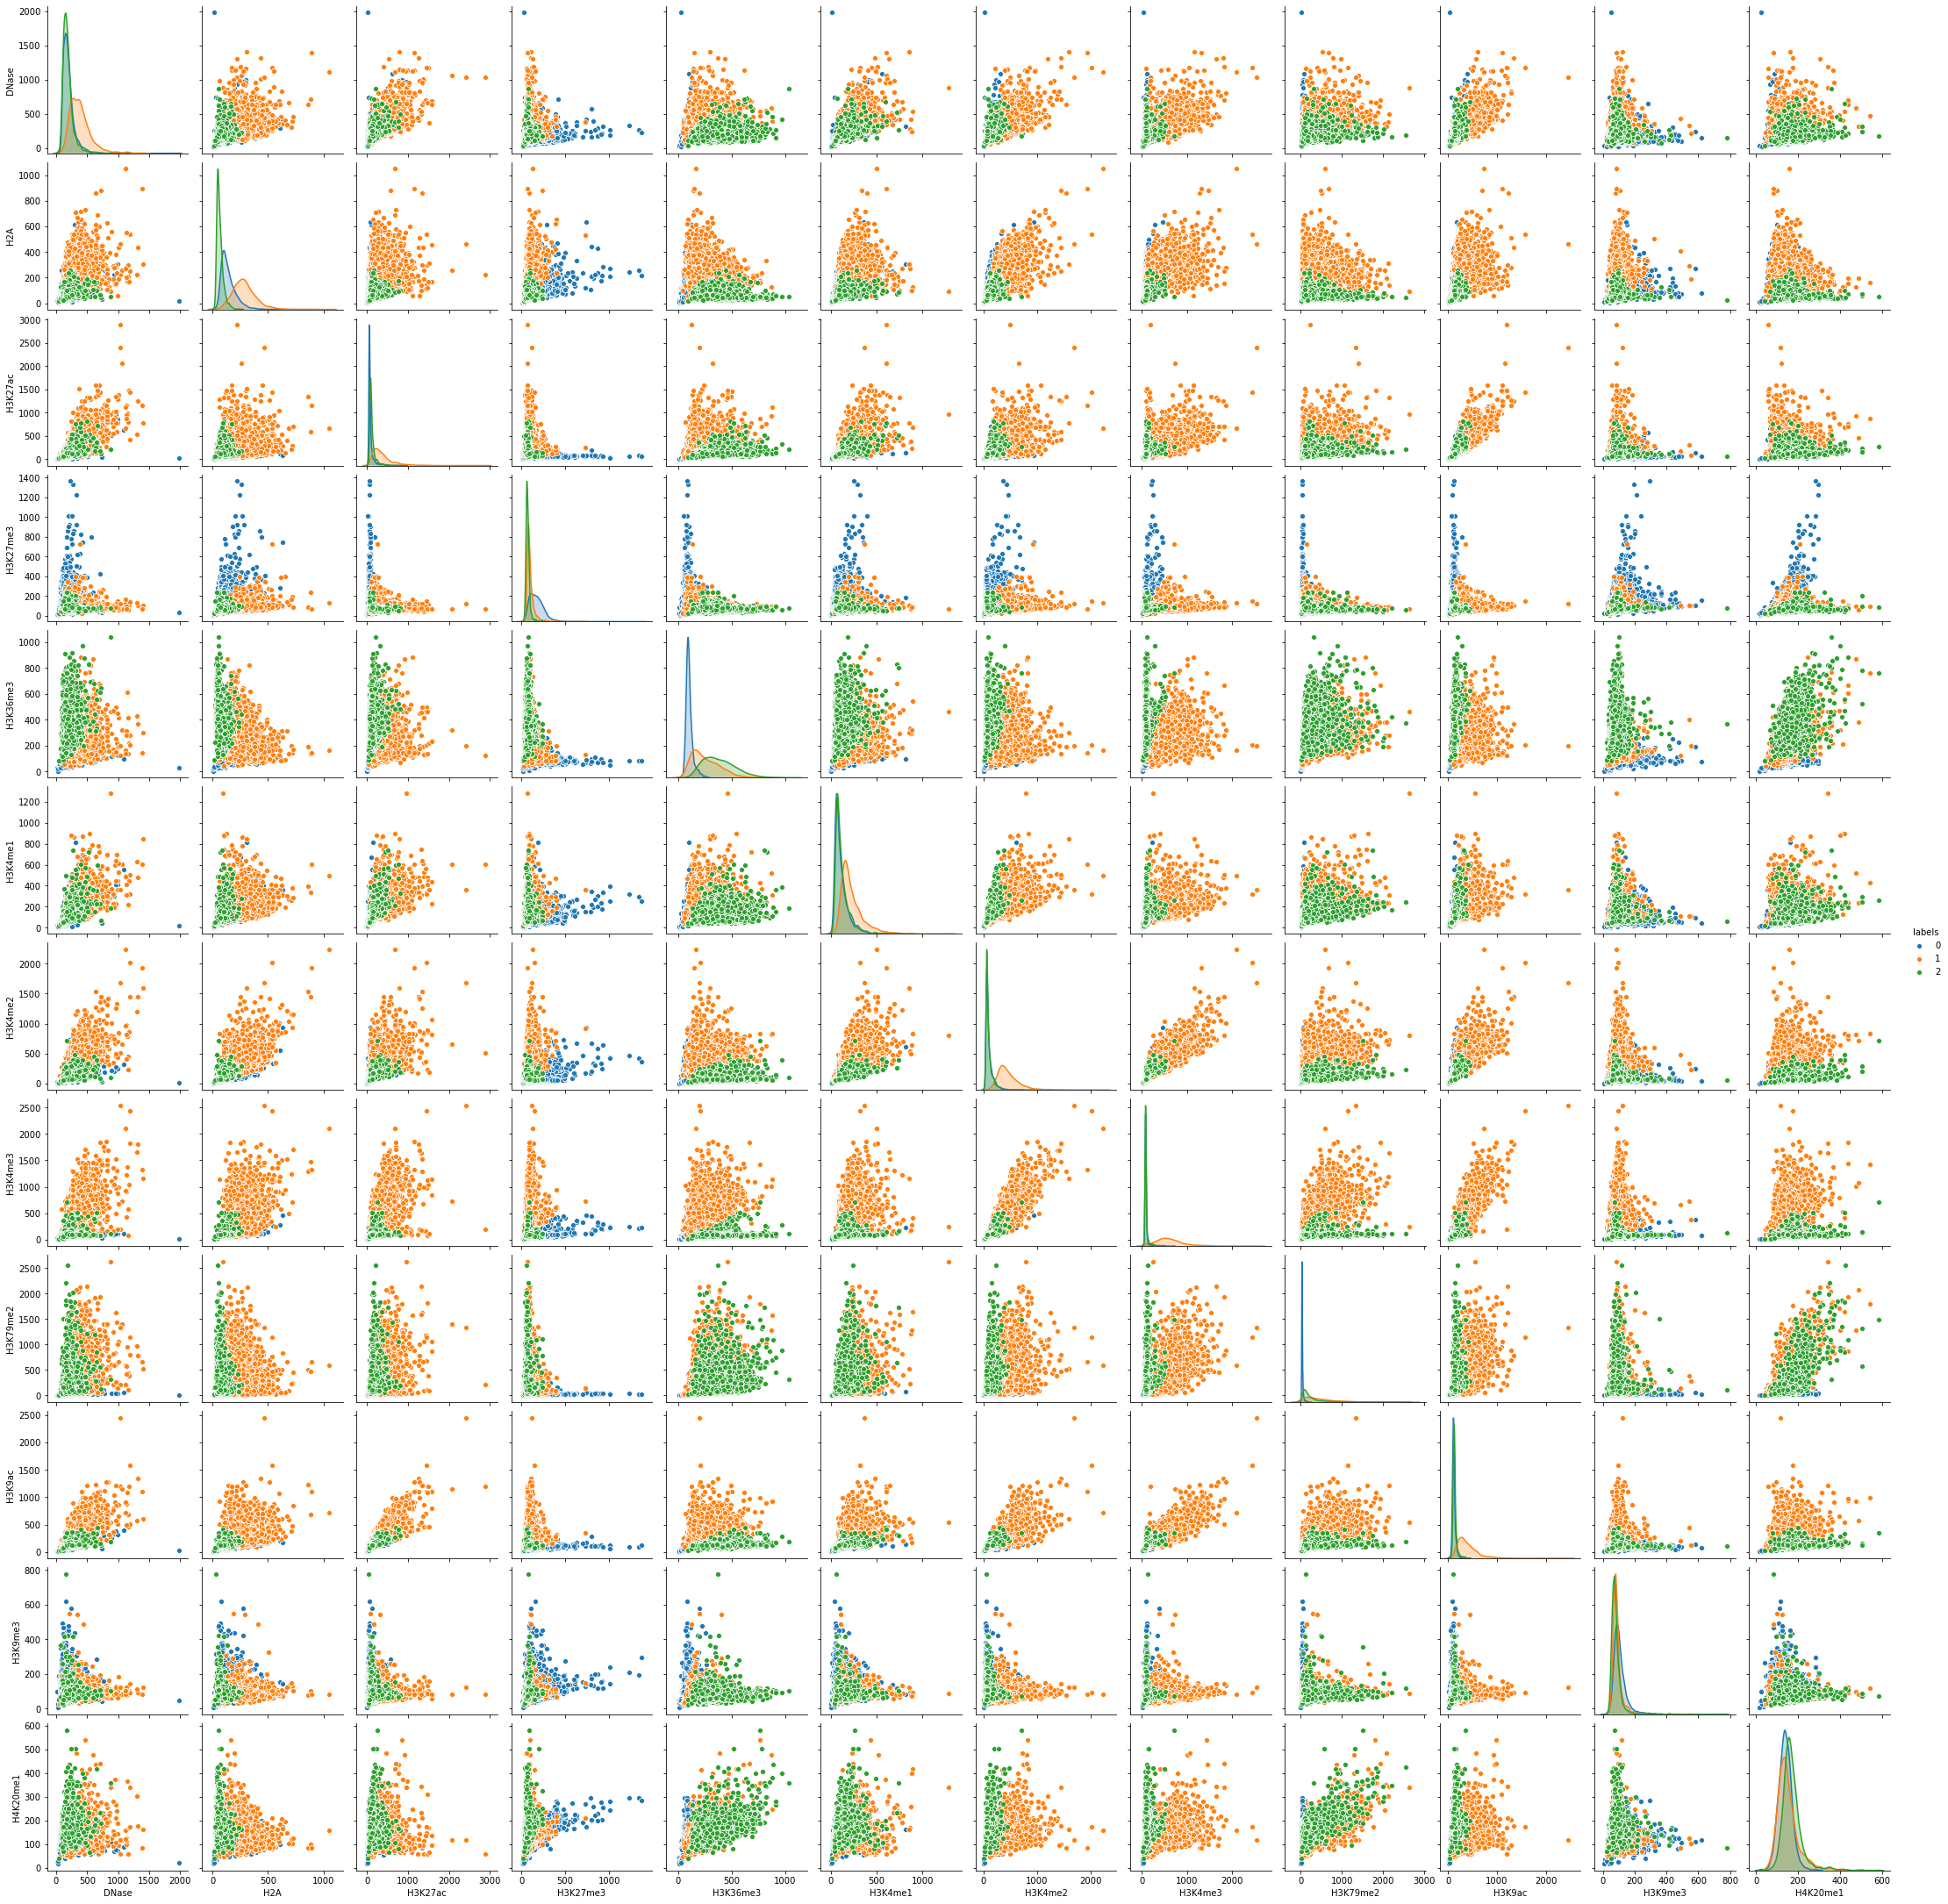

In [17]:
sns.pairplot(labeled,hue='labels')